# Fitting First Order ODE Solutions to Given Data


## Solving First Order ODE

Let $y(t)$ be defined by a system of first order ODEs which involve some unknown parameters $p = (p_1, \ldots, p_l)$. That is

$$\frac{dy(t)}{dt} = f(y(t), t, p)$$

Here, $y$ can be an $\mathbb{R}$-valued or vector-valued function. If $y(t) = (y_1(t), \ldots, y_k(t))$, then $\frac{dy(t)}{dt} = (\frac{dy_1(t)}{dt}, \ldots, \frac{dy_k(t)}{dt})$.

### Task 1. Simple harmonic oscillation

The data in the file `simple-harmonic-noisy.csv` is a noisy reading of a function $y(t)$ defined by the following second order ODE
$$\frac{d^2}{dt^2} y + \omega^2 y = 0$$
with initial conditions $y(0) = 0$ and $y_1(0) = 0$ in the interval $[0,10]$.

Estimate the value of $\omega$ using
1. scipy.optimize.minimize (try multiple methods and time the successfull ones)
2. scipy.optimize.least_squares (try multiple methods and time the successfull ones)

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import scipy.optimize as optimize
import pandas as pd
import time

In [29]:
# Read the data from csv file into a pandas dataframe
df = pd.read_csv("/Users/adityamishra/Documents/Machine Learning Tutorial/1. Machine Learning Specialisation/Important-ML-Implementations/10-Curve-Fitting/data/simple-harmonic-noisy.csv")
print(df.head())

      time         y
0  0.00000 -0.046736
1  0.10101  0.231668
2  0.20202  0.471371
3  0.30303  0.705724
4  0.40404  0.835048


In [30]:
# Storing the data in the numpy arrays
t_eval = np.array(df["time"])# definig t_eval as the time values array
y_real = np.array(df["y"])

In [31]:
# Setting up the IVP: ODE, initial conditions
def harmonic_ode(t,y,omega):
    y_current, y1_current = y # unpacking the y array into y_current and y1_current
    dy_dt = y1_current
    dy1_dt = -(omega ** 2) * y_current
    return [dy_dt, dy1_dt]

#Definding the initial conditions
y0 = [0,1]

In [32]:
# Define residual and cost (least square error) between real data and estimate
def residual(p):
   sol = integrate.solve_ivp(harmonic_ode,(t_eval[0], t_eval[-1]),y0,t_eval=t_eval,args=tuple(p), method='RK45')
   return sol.y[0] - y_real

def cost(p):
    return np.sum(residual(p) ** 2)

In [33]:
# Find omega using scipy.optimize.minimize
p_guess = [3.0]
methods_min = ['Nelder-Mead', 'Powell']

print("Estimating the value of omega using scipy.optimize.minimize: ")
results_min = []# list to store the results of the optimization
for method in methods_min:
    start_time = time.time()# start time of the optimization
    result = optimize.minimize(cost, p_guess, method=method)
    elapsed_time = time.time() - start_time# time taken to optimize
    if result.success:
        print(f"Method:  {method} -> ω = {result.x[0]:.4f}, Cost: {result.fun:.2f}, Time: {elapsed_time:.2f}s")# printing the results where method is the optimization method, result.x[0] is the optimized value of omega, result.fun is the cost and elapsed_time is the time taken to optimize
    else:
        print(f"Method:  {method} Failed.")
         

Estimating the value of omega using scipy.optimize.minimize: 
Method:  Nelder-Mead -> ω = 3.2716, Cost: 51.19, Time: 0.07s
Method:  Powell -> ω = 2.4891, Cost: 17.99, Time: 0.11s


In [34]:
# Find omega using scipy.optimize.least_squares
methods_ls = ['lm', 'trf'] # Levenberg-Marquardt, Trust Region Reflective which means that the optimization is done using the levenberg-marquardt and trust region reflective methods

print("\nEstimating ω using scipy.optimize.least_squares:")
results_ls = []
for method in methods_ls:
    start_time = time.time()
    result = optimize.least_squares(residual, p_guess, method=method)
    elapsed_time = time.time() - start_time
    print(f"Method: {method} -> ω = {result.x[0]:.4f}, Cost: {result.cost:.2f}, Time: {elapsed_time:.2f}s")
    results_ls.append(result)


Estimating ω using scipy.optimize.least_squares:
Method: lm -> ω = 3.2716, Cost: 25.59, Time: 0.10s
Method: trf -> ω = 3.2716, Cost: 25.59, Time: 0.03s


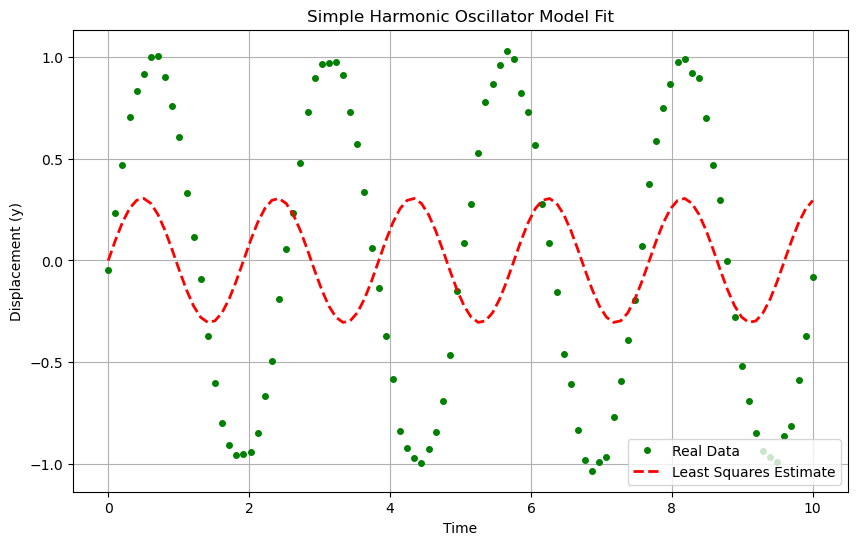

In [36]:
# Plot the solution with the estimated parameter alongside the real data
plt.figure(figsize=(10,6))
plt.plot(t_eval, y_real, 'go', markersize=4, label='Real Data') # plotting the real data where t_eval is the time values and y_real is the real data go is the color of the data points and markersize is the size of the data points
if results_min:
    best_min = min(results_min, key=lambda res: res.fun) # where best_min is the minimum value of the results_min list, key is the function that is used to compare the elements of the list, res.fun is the cost of the result
    sol_min = integrate.solve_ivp(
        harmonic_ode,
        (t_eval[0], t_eval[-1]),
        y0,
        t_eval=t_eval,
        args=tuple(best_min.x)
    )
    plt.plot(t_eval, sol_min.y[0], 'b-',
             linewidth=2, label='Minimize Estimate')

# Plot best results from least_squares
if results_ls:
    best_ls = min(results_ls, key=lambda res: res.cost)
    sol_ls = integrate.solve_ivp(
        harmonic_ode,
        (t_eval[0], t_eval[-1]),
        y0,
        t_eval=t_eval,
        args=tuple(best_ls.x)
    )
    plt.plot(t_eval, sol_ls.y[0], 'r--', linewidth=2,
             label='Least Squares Estimate')

plt.xlabel('Time')
plt.ylabel('Displacement (y)')
plt.title('Simple Harmonic Oscillator Model Fit')
plt.legend()
plt.grid(True)
plt.show()


### Task 2a. Linear Third Order ODE

The data in the file `third-order-noisy-1.csv` is a noisy reading of a function $y(t)$ defined by the following linear third order ODE
$$\frac{d^3 y}{dt^2} + a_2 \frac{d^2 y}{dt^2} + a_1\frac{d}{dt} + a_0y = 0$$
with initial conditions 
$(y(0), \frac{d y}{dt}(0), \frac{d^2 y}{dt^2}(0))  = (0, 1, 1)$ in the interval $[0,10]$.

Estimate the value of $a_0, a_1, a_2$ using
1. scipy.optimize.minimize (try multiple methods and time the successfull ones)
2. scipy.optimize.least_squares (try multiple methods and time the successfull ones)

Visually examine the fit and also report the least square error you could achieve. (Hint: the best fit will achieve it in single digits)

Also report the time taken by the successfull optmization methods.

In [20]:
# Read data from csv file into a pandas data frame
df = pd.read_csv("/Users/adityamishra/Documents/Machine Learning Tutorial/1. Machine Learning Specialisation/Important-ML-Implementations/10-Curve-Fitting/data/third-order-noisy-1.csv")
print(df.head())

       time         y
0  0.000000  0.287365
1  0.202020  0.218582
2  0.404040  0.622298
3  0.606061  0.436935
4  0.808081  0.617910


In [39]:
# Store data in numpy arrays
t_eval = np.array(df["time"])
y_real = np.array(df["y"])

In [40]:
# Set up the IVP: ODE, initial conditions
def third_order_ode(t, y, a0, a1, a2):
    y0, y1, y2 = y
    dy0dt = y1
    dy1dt = y2
    dy2dt = -a2 * y2 - a1 * y1 - a0 * y0
    return [dy0dt, dy1dt, dy2dt]
y0_initial = [0, 1, 1]